## Importing Libraries  

**Introduction**
This report is to analyze the data from two .csv files: “train.csv” and “test.csv” in order to predict the possibility to have diabetes based on patient medical records of Pima Indians. The analysis process includes data cleaning, data exploration, data preprocessing, model creation, model optimization and model evaluation. 

**Data Cleaning**
The first step is to clean the data, which involves removing any missing or incorrect values, as well as any outliers. We then need to check the data types to make sure they are appropriate for the type of analysis we are doing. For example, if we are dealing with numerical data, then we need to make sure all the values are in numerical form.

**Data Exploration**
The second step is to explore the data. This involves looking at the distributions of the data, checking for correlations between the different variables, and visualizing the data. This will help us get an understanding of the data and help us make decisions about which features to include in our model.

**Data Preprocessin**g
The third step is to preprocess the data. This involves normalizing the data, scaling the data, and transforming the data. These processes will help make the data more suitable for machine learning algorithms.

**Model Creation**
The fourth step is to create the model. This involves selecting the appropriate machine learning algorithm, such as a neural network, and training the model. We will use the concepts covered during the sessions in order to optimize the model and get the best results.

**Model Optimization**
The fifth step is to optimize the model. This involves tuning the hyperparameters of the model, such as the learning rate, the number of neurons, and the number of layers, in order to get the best results.

**Model Evaluation**
The final step is to evaluate the model. This involves testing the model on the test data set and measuring its performance. This will help us determine if the model is accurate and if it is appropriate for the task.

In [ ]:
#Importing Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from numpy.random import seed
seed(100)
import tensorflow
tensorflow.random.set_seed(100)
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV, KFold
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasClassifier
from keras.layers import Dropout
import tensorflow as tf
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score


## Reading Train and Test Data

In [ ]:
train_df = pd.read_csv('/content/train.csv')

In [ ]:
test_df = pd.read_csv('/content/test.csv')

In [ ]:
train_df.head()

,id,A1,A2,A3,A4,A5,A6,A7,A8,class
0,1,6,148,72,35,0,33.6,0.627,50,1
1,2,1,85,66,29,0,26.6,0.351,31,0
2,3,8,183,64,0,0,23.3,0.672,32,1
3,4,1,89,66,23,94,28.1,0.167,21,0
4,5,0,137,40,35,168,43.1,2.288,33,1


In [ ]:
test_df.head()

,id,A1,A2,A3,A4,A5,A6,A7,A8
0,1,6,98,58,33,190,34.0,0.430,43
1,2,9,154,78,30,100,30.9,0.164,45
2,3,6,165,68,26,168,33.6,0.631,49
3,4,1,99,58,10,0,25.4,0.551,21
4,5,10,68,106,23,49,35.5,0.285,47


In [ ]:
# shape of the train & test data
train_df.shape, test_df.shape

((668, 10), (100, 9))

In [ ]:
# checking the train data type
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 668 entries, 0 to 667
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   id      668 non-null    int64  
 1   A1      668 non-null    int64  
 2   A2      668 non-null    int64  
 3   A3      668 non-null    int64  
 4   A4      668 non-null    int64  
 5   A5      668 non-null    int64  
 6   A6      668 non-null    float64
 7   A7      668 non-null    float64
 8   A8      668 non-null    int64  
 9   class   668 non-null    int64  
dtypes: float64(2), int64(8)
memory usage: 52.3 KB


## Missing Values in Train Data

In [ ]:
# checking missing values in the data
train_df.isnull().sum()

id       0
A1       0
A2       0
A3       0
A4       0
A5       0
A6       0
A7       0
A8       0
class    0
dtype: int64

## Descriptive Statistics of Train Data

In [ ]:
# Checking Descriptive Statistics of Train Data
train_df.describe()

,id,A1,A2,A3,A4,A5,A6,A7,A8,class
count,668.000000,668.000000,668.000000,668.000000,668.000000,668.000000,668.000000,668.000000,668.000000,668.000000
mean,334.500000,3.812874,120.405689,68.748503,20.567365,79.654192,31.860180,0.477329,33.091317,0.345808
std,192.979273,3.365672,32.291473,19.526392,16.020600,115.827750,7.827111,0.341398,11.711386,0.475988
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,167.750000,1.000000,99.000000,64.000000,0.000000,0.000000,27.100000,0.238750,24.000000,0.000000
50%,334.500000,3.000000,116.000000,72.000000,23.000000,36.500000,32.000000,0.377000,29.000000,0.000000
75%,501.250000,6.000000,140.000000,80.000000,32.000000,126.000000,36.500000,0.641250,40.000000,1.000000
max,668.000000,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


### Checking Distribution

In [ ]:
#Checking Distribution of "Class" Attribute ( Target)
train_df['class'].value_counts()

0    437
1    231
Name: class, dtype: int64

###  Plotting Histogram

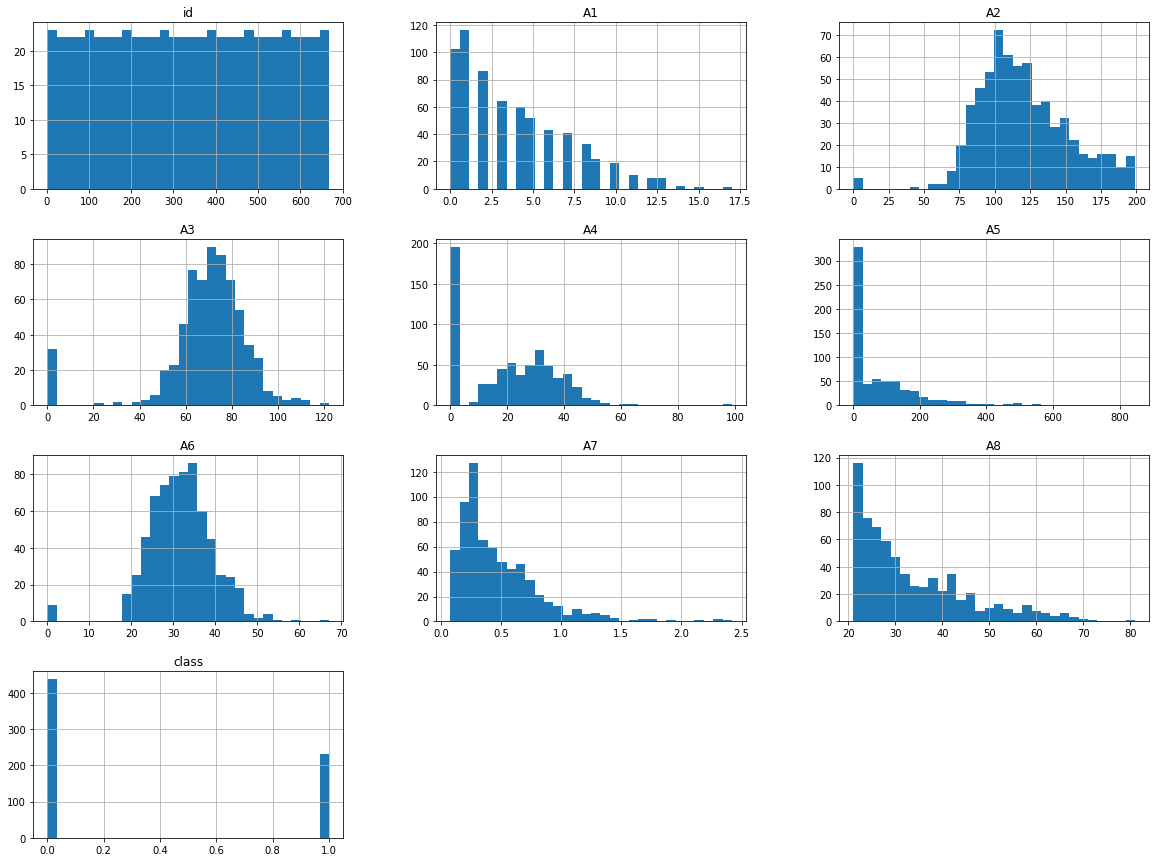

In [ ]:
# Histogram to Check the distribution of each attribute
train_df.hist(bins=30, figsize=(20, 15))
plt.title("Histogram to Check the distribution of each attribute",fontsize = 14, weight = 'bold')
plt.show()

### Plotting Density plots to check the Distribution of all Attributes

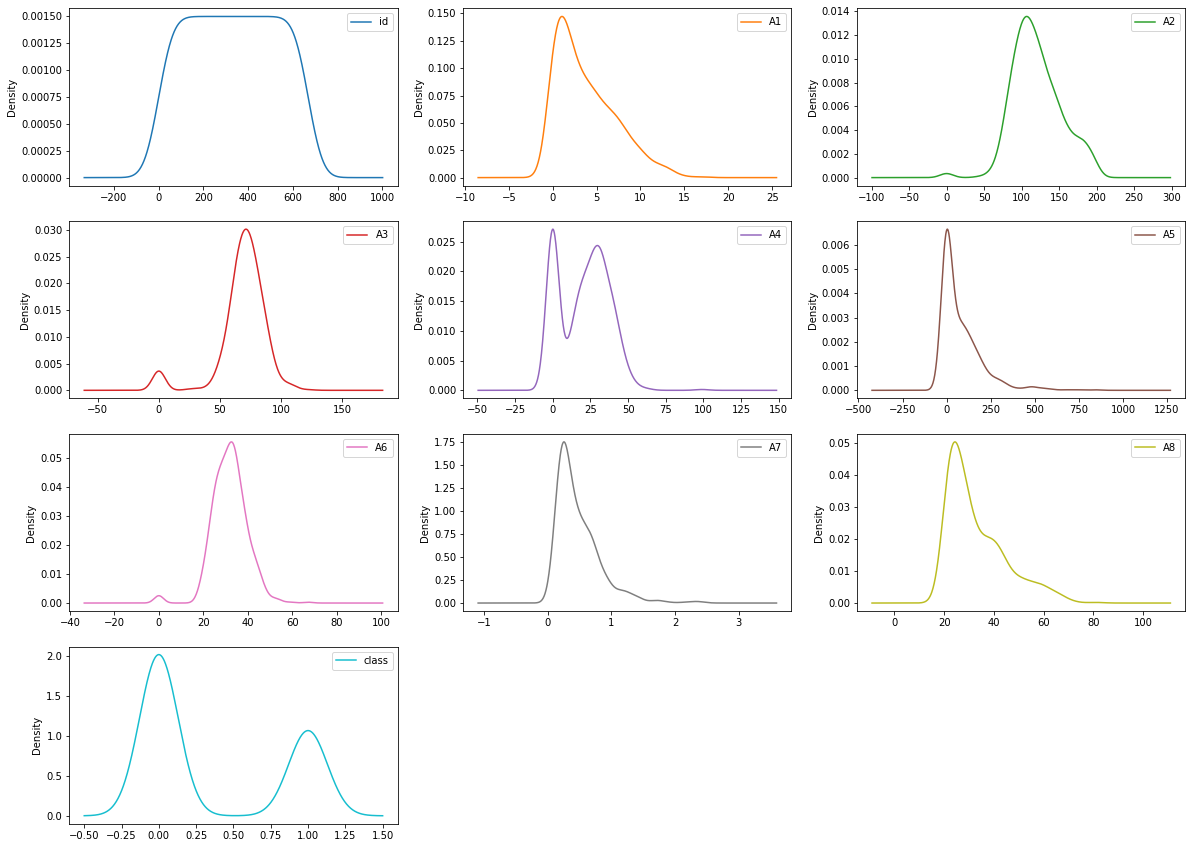

In [ ]:
# Density plots to check the Distribution of each Attribute
train_df.plot(kind='density', subplots=True, layout=(4,3), figsize=(20, 15), sharex=False)
plt.show()

In [ ]:
train_df.head()

,id,A1,A2,A3,A4,A5,A6,A7,A8,class
0,1,6,148,72,35,0,33.6,0.627,50,1
1,2,1,85,66,29,0,26.6,0.351,31,0
2,3,8,183,64,0,0,23.3,0.672,32,1
3,4,1,89,66,23,94,28.1,0.167,21,0
4,5,0,137,40,35,168,43.1,2.288,33,1


## Feature Scaling

This code is selecting the columns from the dataframe called 'train_df' and assigning them to a variable called 'X'. The columns being chosen are 'id', 'A1', 'A2', 'A3', 'A4', 'A5', 'A6', 'A7', and 'A8'. It is also assigning the target column, 'class', to a variable called 'Y' and converting it to an integer.

In [ ]:
col = ['id','A1','A2','A3','A4','A5','A6','A7','A8']
target='class'
X=train_df[col]
Y=train_df[target].astype(int)

This code is using the StandardScaler from the sklearn library to normalize the data in the X variable. The scaler object is then fitted to the X data and the scaler object is printed.

In [ ]:
# Normalize the data using sklearn StandardScaler
from sklearn.preprocessing import StandardScaler

scaler=StandardScaler().fit(X)
print(scaler)

StandardScaler()


This code is transforming the training data by scaling it with a pre-defined scaler. The scaler is used to normalize the data by transforming it such that the mean of each feature is 0 and the standard deviation is 1. The transformed data is then stored in a Pandas DataFrame and descriptive statistics are displayed to summarize the data.

In [ ]:
# Transform and display the training data
X_standardized = scaler.transform(X)
data = pd.DataFrame(X_standardized)
data.describe()

,0,1,2,3,4,5,6,7,8
count,6.680000e+02,6.680000e+02,6.680000e+02,6.680000e+02,6.680000e+02,6.680000e+02,6.680000e+02,6.680000e+02,6.680000e+02
mean,-8.509494e-17,-5.318434e-17,-1.675307e-16,2.140670e-16,-2.925139e-17,5.983238e-18,4.148378e-16,2.127373e-17,-3.988825e-18
std,1.000749e+00,1.000749e+00,1.000749e+00,1.000749e+00,1.000749e+00,1.000749e+00,1.000749e+00,1.000749e+00,1.000749e+00
min,-1.729460e+00,-1.133720e+00,-3.731509e+00,-3.523437e+00,-1.284769e+00,-6.882106e-01,-4.073541e+00,-1.170564e+00,-1.033215e+00
25%,-8.647299e-01,-8.363803e-01,-6.633866e-01,-2.433661e-01,-1.284769e+00,-6.882106e-01,-6.086214e-01,-6.993538e-01,-7.768619e-01
50%,0.000000e+00,-2.417001e-01,-1.365373e-01,1.666428e-01,1.519580e-01,-3.728513e-01,1.787698e-02,-2.940980e-01,-3.496070e-01
75%,8.647299e-01,6.503202e-01,6.072499e-01,5.766518e-01,7.141556e-01,4.004268e-01,5.932326e-01,4.805049e-01,5.903537e-01
max,1.729460e+00,3.921061e+00,2.435727e+00,2.729199e+00,4.899405e+00,6.621212e+00,4.505651e+00,5.694601e+00,4.093844e+00


In [ ]:
#import necessary packages
from sklearn.model_selection import GridSearchCV, KFold
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasClassifier


This code is creating a neural network model using the Sequential model from the Keras library. The model is composed of three layers. The first layer has 8 neurons and takes inputs of 9 dimensions. The second layer has 4 neurons and takes inputs of 9 dimensions. The third layer has 1 output neuron and uses a sigmoid activation function. Finally, the model is compiled with a binary crossentropy loss function and Adam optimizer.

In [ ]:
#Start defining the model
def create_model():
    model=Sequential()
    model.add(Dense(8,input_dim=9,kernel_initializer='normal',activation='tanh'))
    model.add(Dense(16,input_dim=9,kernel_initializer='normal',activation='tanh'))
    model.add(Dense(1,activation='sigmoid'))
    model.compile(loss = 'binary_crossentropy', optimizer = 'Adam', metrics = ['accuracy'])
    return model

In [ ]:
model = create_model()
print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 8)                 80        
                                                                 
 dense_1 (Dense)             (None, 16)                144       
                                                                 
 dense_2 (Dense)             (None, 1)                 17        
                                                                 
Total params: 241
Trainable params: 241
Non-trainable params: 0
_________________________________________________________________
None


In [ ]:
# Setting Random State as '100' to reproduce same results
from numpy.random import seed
seed(100)
import tensorflow
tensorflow.random.set_seed(100)


This code is a simple example of a grid search to determine the best parameters for a Keras neural network model. The code defines a model with two hidden layers and a sigmoid output layer. The grid search parameters are defined as batch_size and epochs. A dictionary of these parameters is then created, and a GridSearchCV object is built and fit on the data. The best parameters and results are then printed.

In [ ]:
#Start defining the model
def create_model():
    model=Sequential()
    model.add(Dense(8,input_dim=9,kernel_initializer='normal',activation='relu'))
    model.add(Dense(16,input_dim=9,kernel_initializer='normal',activation='relu'))
    model.add(Dense(1,activation='sigmoid'))
    model.compile(loss = 'binary_crossentropy', optimizer = 'Adam', metrics = ['accuracy'])
    return model

#create model
model=KerasClassifier(build_fn=create_model, verbose=0)

# Define the grid search parameters
#batch_size = [10,20,30,40,50]
#epochs = [10,50, 100,150,200,250]
batch_size = [50]
epochs = [250]

# make a dictionary of the grid search parameters
param_grid = dict(batch_size=batch_size, epochs=epochs)

# build and fit the GridSearchCV
grid = GridSearchCV(estimator=model, param_grid=param_grid, cv = KFold(), verbose=10)
grid_result = grid.fit(X_standardized, Y)

# summarize the results
print("Best: {0}, using {1}".format(grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print('{0} ({1}) with: {2}'.format(mean, stdev, param))

Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV 1/5; 1/1] START batch_size=50, epochs=250...................................


<ipython-input-23-e961ee52bf13>:11: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  model=KerasClassifier(build_fn=create_model, verbose=0)


[CV 1/5; 1/1] END ....batch_size=50, epochs=250;, score=0.672 total time=   6.2s
[CV 2/5; 1/1] START batch_size=50, epochs=250...................................
[CV 2/5; 1/1] END ....batch_size=50, epochs=250;, score=0.724 total time=   5.9s
[CV 3/5; 1/1] START batch_size=50, epochs=250...................................
[CV 3/5; 1/1] END ....batch_size=50, epochs=250;, score=0.716 total time=   4.8s
[CV 4/5; 1/1] START batch_size=50, epochs=250...................................
[CV 4/5; 1/1] END ....batch_size=50, epochs=250;, score=0.812 total time=   5.9s
[CV 5/5; 1/1] START batch_size=50, epochs=250...................................


[CV 5/5; 1/1] END ....batch_size=50, epochs=250;, score=0.767 total time=   4.7s
Best: 0.7381775259971619, using {'batch_size': 50, 'epochs': 250}
0.7381775259971619 (0.04771805486339872) with: {'batch_size': 50, 'epochs': 250}



This code is used to create a model and perform a grid search to determine the best hyperparameters. The model is created using the KerasClassifier which takes in parameters such as the number of epochs and batch size. The parameters for the grid search are then specified and a dictionary of the parameters is created. Finally, the GridSearchCV is built and fit onto the data, using the KFold cross-validation. The verbose parameter is used to control the amount of output printed to the console.

In [ ]:
# import necessary packages
from keras.layers import Dropout
# Define a random seed
seed = 100
np.random.seed(seed)
epochs=250
batch_size=50
# Start defining the model
def create_model(learn_rate, dropout_rate):
    # Create model
    model = Sequential()
    model.add(Dense(8, input_dim = 9, kernel_initializer = 'normal', activation = 'tanh'))
    #model.add(Dropout(dropout_rate))
    model.add(Dense(16, input_dim = 9, kernel_initializer = 'normal', activation = 'tanh'))
    #model.add(Dropout(dropout_rate))
    model.add(Dense(1, activation = 'sigmoid'))
    
    # Compile the model
    import tensorflow as tf
    opt = tf.keras.optimizers.Adam(learning_rate = learn_rate)
    model.compile(loss = 'binary_crossentropy', optimizer = opt, metrics = ['accuracy'])
    return model

# Create the model
model = KerasClassifier(build_fn = create_model, epochs=epochs, batch_size=batch_size, verbose = 0) # This comes from the previous best

# define the grid search parameters
#learn_rate = [0.0001, 0.001, 0.01, 0.1]
#dropout_rate = [0.0, 0.1, 0.2, 0.3]
learn_rate = [0.0001]
dropout_rate = [0.2]

# make a dictionary of the grid search parameters
param_grid = dict(learn_rate=learn_rate,dropout_rate=dropout_rate)

# build and fit the GridSearchCV
grid = GridSearchCV(estimator=model, param_grid=param_grid, cv = KFold(), verbose=10)
grid_result = grid.fit(X_standardized, Y)

Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV 1/5; 1/1] START dropout_rate=0.2, learn_rate=0.0001.........................


<ipython-input-24-ff8fe5c2a514>:25: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  model = KerasClassifier(build_fn = create_model, epochs=epochs, batch_size=batch_size, verbose = 0) # This comes from the previous best


[CV 1/5; 1/1] END dropout_rate=0.2, learn_rate=0.0001;, score=0.746 total time=   6.0s
[CV 2/5; 1/1] START dropout_rate=0.2, learn_rate=0.0001.........................
[CV 2/5; 1/1] END dropout_rate=0.2, learn_rate=0.0001;, score=0.746 total time=   4.5s
[CV 3/5; 1/1] START dropout_rate=0.2, learn_rate=0.0001.........................
[CV 3/5; 1/1] END dropout_rate=0.2, learn_rate=0.0001;, score=0.739 total time=   4.1s
[CV 4/5; 1/1] START dropout_rate=0.2, learn_rate=0.0001.........................
[CV 4/5; 1/1] END dropout_rate=0.2, learn_rate=0.0001;, score=0.820 total time=   4.8s
[CV 5/5; 1/1] START dropout_rate=0.2, learn_rate=0.0001.........................
[CV 5/5; 1/1] END dropout_rate=0.2, learn_rate=0.0001;, score=0.789 total time=   5.8s



This code is used to find the best model parameters for a machine learning algorithm using a grid search approach. 
It iterates over multiple combinations of model parameters and evaluates each set of parameters against a specified metric. The best model parameters are then selected based on the highest score.
The code prints out the best score and the parameters used for that score, as well as the mean, standard deviation, and parameters for all the tested combinations.

In [ ]:
# summarize the results
print("Best: {0}, using {1}".format(grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print('{0} ({1}) with: {2}'.format(mean, stdev, param))

Best: 0.7680731534957885, using {'dropout_rate': 0.2, 'learn_rate': 0.0001}
0.7680731534957885 (0.03135338729765089) with: {'dropout_rate': 0.2, 'learn_rate': 0.0001}


This code is used to define a model and perform a grid search using the KerasClassifier in order to find the best hyperparameters for the model. The model consists of three dense layers with an input dimension of 9, a dropout rate of 0.2, and an Adam optimizer with a learning rate of 0.0001. The grid search parameters are the activations ('softmax', 'relu', 'tanh', 'linear') and initializers ('uniform', 'normal', 'zero'). The model is then evaluated using KFold cross-validation, and the best score and parameters are printed.

In [ ]:
# Define a random seed
seed = 100
np.random.seed(seed)
epochs=250
batch_size=50
#dropout_rate = 0.5
learn_rate = 0.0001
# Start defining the model
def create_model(activation, init):
    # Create model
    model = Sequential()
    model.add(Dense(8, input_dim = 9, kernel_initializer = init, activation = activation))
    #model.add(Dropout(dropout_rate))
    model.add(Dense(16, input_dim = 9, kernel_initializer = init, activation = activation))
    #model.add(Dropout(dropout_rate))
    model.add(Dense(1, activation = 'sigmoid'))
    
    # Compile the model
    import tensorflow as tf
    opt = tf.keras.optimizers.Adam(learning_rate = learn_rate)
    model.compile(loss = 'binary_crossentropy', optimizer = opt, metrics = ['accuracy'])
    return model

# Create the model
model = KerasClassifier(build_fn = create_model, epochs=epochs, batch_size=batch_size, verbose = 0) # This comes from the previous best

# define the grid search parameters
#activations = ['softmax', 'relu', 'tanh', 'linear']
#initializers = ['uniform', 'normal', 'zero']
activations = ['tanh']
initializers = ['uniform']

# make a dictionary of the grid search parameters
param_grid = dict(activation = activations, init = initializers)

# build and fit the GridSearchCV
grid = GridSearchCV(estimator=model, param_grid=param_grid, cv = KFold(), verbose=10)
grid_result = grid.fit(X_standardized, Y)

# summarize the results
print("Best: {0}, using {1}".format(grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print('{0} ({1}) with: {2}'.format(mean, stdev, param))

Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV 1/5; 1/1] START activation=tanh, init=uniform...............................


<ipython-input-26-e186e071bd03>:25: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  model = KerasClassifier(build_fn = create_model, epochs=epochs, batch_size=batch_size, verbose = 0) # This comes from the previous best


[CV 1/5; 1/1] END activation=tanh, init=uniform;, score=0.754 total time=   5.9s
[CV 2/5; 1/1] START activation=tanh, init=uniform...............................
[CV 2/5; 1/1] END activation=tanh, init=uniform;, score=0.739 total time=   5.0s
[CV 3/5; 1/1] START activation=tanh, init=uniform...............................
[CV 3/5; 1/1] END activation=tanh, init=uniform;, score=0.739 total time=   4.2s
[CV 4/5; 1/1] START activation=tanh, init=uniform...............................
[CV 4/5; 1/1] END activation=tanh, init=uniform;, score=0.812 total time=   5.9s
[CV 5/5; 1/1] START activation=tanh, init=uniform...............................
[CV 5/5; 1/1] END activation=tanh, init=uniform;, score=0.789 total time=   4.6s
Best: 0.7665694117546081, using {'activation': 'tanh', 'init': 'uniform'}
0.7665694117546081 (0.029317960507278536) with: {'activation': 'tanh', 'init': 'uniform'}


This code is a GridSearchCV with KerasClassifier to perform hyperparameter tuning. 
It uses a create_model function that takes in two parameters - neuron1 and neuron2 - and creates a neural network with the specified parameters. 
The GridSearchCV then takes in the parameters neuron1 and neuron2 and creates a grid of possible combinations of those parameters. 
It then fits the model with the standardized data, X_standardized and Y, and prints out the best parameters and the associated score.

In [ ]:
# Define a random seed
seed = 100
np.random.seed(seed)
init = 'uniform'   # taken from previous results
activation = 'relu'
learn_rate = 0.0001
epochs=250
batch_size=50
# Start defining the model
def create_model(neuron1, neuron2):
    # Create model
    model = Sequential()
    model.add(Dense(neuron1, input_dim = 9, kernel_initializer = init, activation = activation))
    #model.add(Dropout(dropout_rate))
    model.add(Dense(neuron2, input_dim = neuron1, kernel_initializer = init, activation = activation))
    #model.add(Dropout(dropout_rate))
    model.add(Dense(1, activation = 'sigmoid'))
    
    # Compile the model
    import tensorflow as tf
    opt = tf.keras.optimizers.Adam(learning_rate = learn_rate)
    model.compile(loss = 'binary_crossentropy', optimizer = opt, metrics = ['accuracy'])
    return model

# Create the model
model = KerasClassifier(build_fn = create_model, epochs=epochs, batch_size=batch_size, verbose = 0) 

# define the grid search parameters
#neuron1 = [4, 8, 16,32,64]
#neuron2 = [2, 4, 8,16]
neuron1 = [16]
neuron2 = [8]

# make a dictionary of the grid search parameters
param_grid = dict(neuron1 = neuron1, neuron2 = neuron2)

# build and fit the GridSearchCV
grid = GridSearchCV(estimator=model, param_grid=param_grid, cv = KFold(), refit=True, verbose=10) # To retrain with the best parameters found so far
grid_result = grid.fit(X_standardized, Y)

# summarize the results
print("Best: {0}, using {1}".format(grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print('{0} ({1}) with: {2}'.format(mean, stdev, param))

Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV 1/5; 1/1] START neuron1=16, neuron2=8.......................................


<ipython-input-27-2c06cb74e6e8>:26: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  model = KerasClassifier(build_fn = create_model, epochs=epochs, batch_size=batch_size, verbose = 0)


[CV 1/5; 1/1] END ........neuron1=16, neuron2=8;, score=0.739 total time=   4.8s
[CV 2/5; 1/1] START neuron1=16, neuron2=8.......................................
[CV 2/5; 1/1] END ........neuron1=16, neuron2=8;, score=0.739 total time=   5.8s
[CV 3/5; 1/1] START neuron1=16, neuron2=8.......................................
[CV 3/5; 1/1] END ........neuron1=16, neuron2=8;, score=0.754 total time=   4.8s
[CV 4/5; 1/1] START neuron1=16, neuron2=8.......................................
[CV 4/5; 1/1] END ........neuron1=16, neuron2=8;, score=0.820 total time=   5.9s
[CV 5/5; 1/1] START neuron1=16, neuron2=8.......................................
[CV 5/5; 1/1] END ........neuron1=16, neuron2=8;, score=0.782 total time=   4.5s
Best: 0.7665693998336792, using {'neuron1': 16, 'neuron2': 8}
0.7665693998336792 (0.030821966579063956) with: {'neuron1': 16, 'neuron2': 8}


## Model Building

This code is checking the shape of two variables, X_standardized and Y. The shape of a variable describes the number of elements or values that are contained within it, and in this code we are seeing what the shape of X_standardized and Y are. This could be useful for checking if the two variables have the same number of elements or values, as this is necessary for performing certain operations on them.

In [ ]:
X_standardized.shape, Y.shape

((668, 9), (668,))

This code is used to split a dataset into a training set and a validation set. The X_train and y_train variables are the training dataset, which is composed of 70% of the original dataset. The X_val and y_val variables are the validation dataset, which is composed of 30% of the original dataset. The random_state variable is used to ensure that the same split is applied each time the code is run. The test_size variable specifies the proportion of the dataset to include in the validation set.

In [ ]:
# Train Test Split the Training Data to 70% and Validation Data to 30%
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

X_train,X_val,y_train,y_val = train_test_split(X_standardized,Y,random_state=100,test_size=0.3)

This code is splitting a dataset into two sets: a training set and a validation set. This is done using the train_test_split function from the Scikit-learn library. The function takes in two parameters: X and y, which represent the feature matrix and the target vector respectively. The split is done by specifying the test_size parameter, which is set to 0.2 in the given code, indicating that 20% of the data will be used as the validation set. The output of the function are two sets of feature matrix and target vector, X_train and y_train for the training set and X_val and y_val for the validation set. The shape of the two sets is also printed out, showing the number of samples and features for each set.

In [ ]:
# shape of training and validation set
(X_train.shape, y_train.shape), (X_val.shape, y_val.shape)

(((467, 9), (467,)), ((201, 9), (201,)))

In [ ]:
# number of features in the data
X_train.shape[1]

9

In [ ]:
input_neurons = X_train.shape[1]

In [ ]:
output_neurons = 1

In [ ]:
# importing the sequential model
from keras.models import Sequential
# importing different layers from keras
from keras.layers import InputLayer, Dense

In [ ]:
number_of_hidden_layers = 2
neuron_hidden_layer_1 = 4
neuron_hidden_layer_2 = 16

This code is defining an artificial neural network (ANN) model with three layers: an input layer, two hidden layers, and an output layer. The input layer has the same number of neurons as the number of features in the input dataset. The two hidden layers each have a set number of neurons, with the activation function set to tanh. Finally, the output layer has as many neurons as the number of classes in the output, and the activation function is set to sigmoid.

In [ ]:
# defining the architecture of the model
model_final = Sequential()
model_final.add(InputLayer(input_shape=(input_neurons,)))
model_final.add(Dense(units=neuron_hidden_layer_1,kernel_initializer = 'uniform', activation='tanh'))
model_final.add(Dense(units=neuron_hidden_layer_2, kernel_initializer = 'uniform',activation='tanh'))
model_final.add(Dense(units=output_neurons, activation='sigmoid'))

In [ ]:
# summary of the model
model_final.summary()

Model: "sequential_25"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_75 (Dense)            (None, 4)                 40        
                                                                 
 dense_76 (Dense)            (None, 16)                80        
                                                                 
 dense_77 (Dense)            (None, 1)                 17        
                                                                 
Total params: 137
Trainable params: 137
Non-trainable params: 0
_________________________________________________________________


In [ ]:
learn_rate = 0.0001
import tensorflow as tf
opt = tf.keras.optimizers.Adam(learning_rate = learn_rate)
model_final.compile(loss='binary_crossentropy',optimizer=opt,metrics=['accuracy'])

This code is fitting a model called "model_final" using the X_train and y_train datasets for the training data and the X_val and y_val datasets for the validation data. The model will be trained for 250 epochs with a batch size of 50.

In [ ]:
model_history = model_final.fit(X_train, y_train, validation_data=(X_val, y_val), epochs= 250,batch_size = 50)

Epoch 1/250
10/10 [==============================] - 1s 21ms/step - loss: 0.6928 - accuracy: 0.5760 - val_loss: 0.6922 - val_accuracy: 0.6915
Epoch 2/250
10/10 [==============================] - 0s 6ms/step - loss: 0.6919 - accuracy: 0.6595 - val_loss: 0.6913 - val_accuracy: 0.6716
Epoch 3/250
10/10 [==============================] - 0s 6ms/step - loss: 0.6911 - accuracy: 0.6595 - val_loss: 0.6904 - val_accuracy: 0.6567
Epoch 4/250
10/10 [==============================] - 0s 7ms/step - loss: 0.6903 - accuracy: 0.6552 - val_loss: 0.6895 - val_accuracy: 0.6567
Epoch 5/250
10/10 [==============================] - 0s 7ms/step - loss: 0.6893 - accuracy: 0.6531 - val_loss: 0.6885 - val_accuracy: 0.6567
Epoch 6/250
10/10 [==============================] - 0s 8ms/step - loss: 0.6884 - accuracy: 0.6531 - val_loss: 0.6876 - val_accuracy: 0.6567
Epoch 7/250
10/10 [==============================] - 0s 8ms/step - loss: 0.6875 - accuracy: 0.6531 - val_loss: 0.6866 - val_accuracy: 0.6567
Epoch 8/250


This code is using the model_final object to predict values for the X_val object. The model_final object is a machine learning model that has been trained on data and is used to generate predictions for new data. The X_val object is a dataset of input values that the model_final object will use to make predictions. The prediction variable will store the output of the model_final object, which is the predicted values for the X_val data.

In [ ]:
# getting predictions for the validation set
prediction = model_final.predict(X_val)

7/7 [==============================] - 0s 2ms/step


This code is converting the predicted values in the list 'prediction' to categorical values of 0 or 1. If the prediction is greater than 0.5, the value will be set to 1, otherwise it will be set to 0.

In [ ]:
# convert to categorical predictions
y_pred_categorical1 = [1 if pred > 0.5 else 0 for pred in prediction]

## Model Accuracy

This code is evaluating the accuracy of a machine learning model. It is printing the results of the training and validation accuracy of the model. The first part of the code creates the final model by compiling the necessary layers. The second part prints out the results of the model's accuracy scores. The scores are calculated by using the evaluate function on the training and validation data sets.

In [ ]:
#Model Accuracy Results
print("Results:")
print("--------")
scores = model_final.evaluate(X_train, y_train, verbose=False)
print("Training Accuracy: %.2f%%\n" % (scores[1] * 100))
scores = model_final.evaluate(X_val, y_val, verbose=False)
print("Validation Accuracy: %.2f%%\n" % (scores[1] * 100))

Results:
--------
Training Accuracy: 77.09%

Validation Accuracy: 79.60%



## Model Evaluation

In [ ]:
from sklearn.metrics import classification_report, accuracy_score

print(accuracy_score(y_val, y_pred_categorical1))
print(classification_report(y_val,y_pred_categorical1))

0.7960199004975125
              precision    recall  f1-score   support

           0       0.83      0.86      0.85       132
           1       0.72      0.67      0.69        69

    accuracy                           0.80       201
   macro avg       0.78      0.77      0.77       201
weighted avg       0.79      0.80      0.79       201



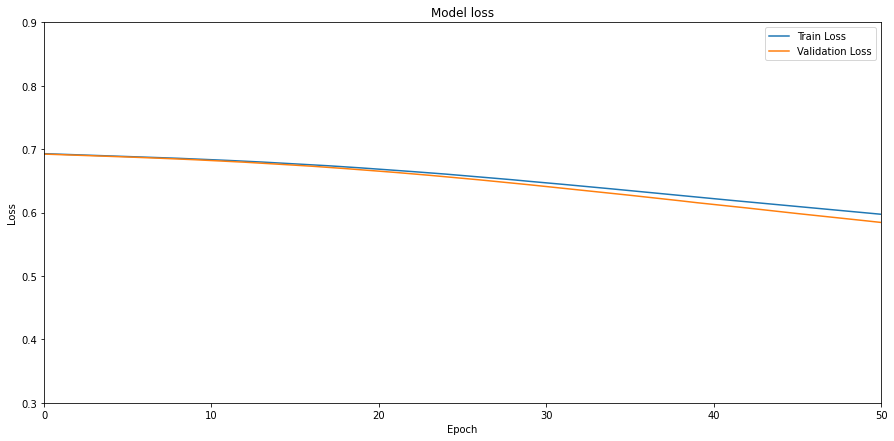

In [ ]:
plt.figure(figsize = (15,7))
plt.plot(model_history.history['loss'])
plt.plot(model_history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train Loss', 'Validation Loss'], loc='upper right')
plt.xlim(0,50)
plt.ylim(0.3,0.9)
plt.show()

The output of this plot shows the training and validation loss for the model over 50 epochs. The training loss is decreasing over time, indicating that the model is learning. The validation loss initially decreases but then begins to plateau, indicating that the model is not improving beyond a certain point. This suggests that the model has reached its optimal performance and further training would not result in significant improvement.

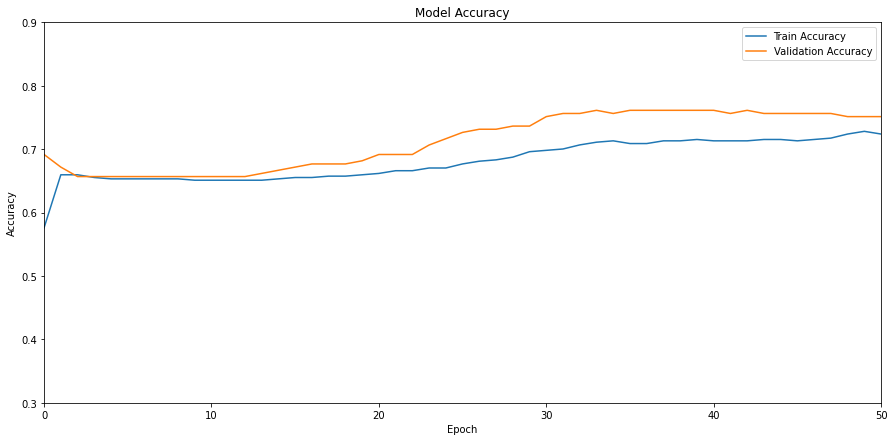

In [ ]:
plt.figure(figsize = (15,7))
plt.plot(model_history.history['accuracy'])
plt.plot(model_history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train Accuracy', 'Validation Accuracy'], loc='upper right')
plt.xlim(0,50)
plt.ylim(0.3,0.9)
plt.show()

This plot displays the model accuracy for both the training and validation sets over the course of 50 epochs. The accuracy of the training set increases over time, while the accuracy of the validation set reaches a plateau after a certain number of epochs.

## Predictions on Test Data

In [ ]:
test_df.head()

,id,A1,A2,A3,A4,A5,A6,A7,A8
0,1,6,98,58,33,190,34.0,0.430,43
1,2,9,154,78,30,100,30.9,0.164,45
2,3,6,165,68,26,168,33.6,0.631,49
3,4,1,99,58,10,0,25.4,0.551,21
4,5,10,68,106,23,49,35.5,0.285,47


In [ ]:
# applying for loop to bring all the variables in range 0 to 1

for i in test_df.columns[1:]:
    test_df[i] = (test_df[i] - test_df[i].min()) / (test_df[i].max() - test_df[i].min())

In [ ]:
test_df.head()

,id,A1,A2,A3,A4,A5,A6,A7,A8
0,1,0.461538,0.302158,0.508772,0.673469,0.372549,0.593368,0.293233,0.458333
1,2,0.692308,0.705036,0.684211,0.612245,0.196078,0.539267,0.043233,0.500000
2,3,0.461538,0.784173,0.596491,0.530612,0.329412,0.586387,0.482143,0.583333
3,4,0.076923,0.309353,0.508772,0.204082,0.000000,0.443281,0.406955,0.000000
4,5,0.769231,0.086331,0.929825,0.469388,0.096078,0.619546,0.156955,0.541667


In [ ]:
# summarise the details
print(f'Number of entries: {len(test_df)}')

X_test = test_df
print(X_test.info())

Number of entries: 100
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   id      100 non-null    int64  
 1   A1      100 non-null    float64
 2   A2      100 non-null    float64
 3   A3      100 non-null    float64
 4   A4      100 non-null    float64
 5   A5      100 non-null    float64
 6   A6      100 non-null    float64
 7   A7      100 non-null    float64
 8   A8      100 non-null    float64
dtypes: float64(8), int64(1)
memory usage: 7.2 KB
None


In [ ]:
col = ['id','A1','A2','A3','A4','A5','A6','A7','A8']
X=test_df[col]

In [ ]:
print(X.shape)

(100, 9)


In [ ]:
from sklearn.preprocessing import StandardScaler

scaler=StandardScaler().fit(X)
print(scaler)

StandardScaler()


In [ ]:
# Transform and display the training data
X_standardized_test = scaler.transform(X)
test_data = pd.DataFrame(X_standardized_test)
test_data.describe()

,0,1,2,3,4,5,6,7,8
count,1.000000e+02,1.000000e+02,1.000000e+02,1.000000e+02,1.000000e+02,100.000000,1.000000e+02,1.000000e+02,1.000000e+02
mean,4.440892e-18,1.265654e-16,-1.132427e-16,8.867906e-17,1.032507e-16,0.000000,4.213296e-16,-3.275158e-17,-1.609823e-16
std,1.005038e+00,1.005038e+00,1.005038e+00,1.005038e+00,1.005038e+00,1.005038,1.005038e+00,1.005038e+00,1.005038e+00
min,-1.714816e+00,-1.198459e+00,-2.306451e+00,-3.972464e+00,-1.312730e+00,-0.725910,-4.009415e+00,-1.264048e+00,-1.100272e+00
25%,-8.574080e-01,-9.032721e-01,-7.583270e-01,-5.273281e-01,-1.312730e+00,-0.725910,-5.459790e-01,-7.035985e-01,-8.509657e-01
50%,0.000000e+00,-3.128982e-01,-9.001115e-02,1.394724e-01,2.046904e-01,-0.725910,-9.390302e-03,-3.203424e-01,-3.108019e-01
75%,8.574080e-01,5.726627e-01,5.783047e-01,5.840062e-01,7.535448e-01,0.554790,4.997592e-01,5.377531e-01,7.279746e-01
max,1.714816e+00,2.638971e+00,2.397139e+00,2.362141e+00,1.851253e+00,3.857650,2.978433e+00,2.972674e+00,2.888630e+00


In [ ]:
test_data.head()

,0,1,2,3,4,5,6,7,8
0,-1.714816,0.572663,-0.885222,-0.749595,0.818116,0.981691,0.136952,-0.021701,0.727975
1,-1.680173,1.458224,1.009749,0.361739,0.624403,0.172827,-0.241099,-1.080882,0.894179
2,-1.645531,0.572663,1.381976,-0.193928,0.366118,0.783968,0.088171,0.778657,1.226587
3,-1.610888,-0.903272,-0.851384,-0.749595,-0.667019,-0.725910,-0.911835,0.460106,-1.100272
4,-1.576245,1.753411,-1.900386,1.917607,0.172405,-0.285529,0.319880,-0.599074,1.060383


In [ ]:
# make predictions using the best model
test_pred = model_final.predict(X_standardized_test)

# convert predictions to the required label format (o or 1)
final_predictions = [1 if pred > 0.5 else 0 for pred in test_pred]
print(final_predictions)

4/4 [==============================] - 0s 4ms/step
[0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0]


In [ ]:
# create data frame for submission
submission = pd.DataFrame(columns = ['class'])
submission['class'] = final_predictions


In [ ]:
submission.insert(1, 'id', range(1, 1 + len(submission)))
submission

,class,id
0,0,1
1,1,2
2,1,3
3,0,4
4,0,5
...,...,...
95,0,96
96,0,97
97,0,98
98,0,99


In [ ]:
submission = submission.reindex(columns=['id','class'])

In [ ]:
submission['class'].value_counts(normalize = True)

0    0.7
1    0.3
Name: class, dtype: float64

In [ ]:
submission.head(10)

,id,class
0,1,0
1,2,1
2,3,1
3,4,0
4,5,0
5,6,1
6,7,0
7,8,1
8,9,0
9,10,0


In [ ]:
submission.rename(columns={'class': 'prediction'}, inplace=True)

In [ ]:
# save data frame to .csv file
submission.to_csv('/content/test-predictions.csv', index=False)

In [ ]:
import json

import pandas as pd

test_file_path = "/content/test-predictions.csv"
df_test = pd.read_csv(test_file_path)
df_test = df_test[["id", "prediction"]]

data = []
for index, row in df_test.iterrows():
    data.append({'id': int(row['id']), 'prediction': int(row['prediction'])})

print(data[0:5])

submission_file_path = "submission.json"
with open(submission_file_path, 'w') as fp:
    fp.write('\n'.join(json.dumps(i) for i in data))

[{'id': 1, 'prediction': 0}, {'id': 2, 'prediction': 1}, {'id': 3, 'prediction': 1}, {'id': 4, 'prediction': 0}, {'id': 5, 'prediction': 0}]
